<a href="https://colab.research.google.com/github/silvererudite/simulationAndModeling/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import sympy
from sympy import *
import matplotlib.pyplot as plt
init_printing(use_unicode=True)

In [19]:
x, t=symbols('x, t')
eqn1= exp(-(x-t)**2)*sin(3*pi*(x-t)) #Defining the equation
eqn2=simplify(eqn1) #simplifying
pprint(eqn2)

          2                   
  -(t - x)                    
-ℯ         ⋅sin(π⋅(3⋅t - 3⋅x))


In [26]:
# ex 5.28
def f(x,t):
  
  return  

x=np.linspace(-4,4,50)
for t in range(50):
    plt.plot(x, f(x,t))
plt.show()

AttributeError: ignored

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def f(z,t):
    return exp(-(x-t)**2)*sin(3*pi*(x-t))

x = np.linspace(-4,4)
t = np.arange(0,100)

for tval in t:
    plt.plot(x, f(x, tval))
plt.show()

AttributeError: ignored

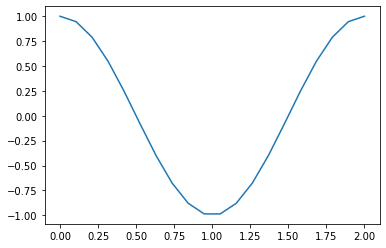

In [34]:
#5.30
x = np.linspace(0, 2, 20)
y = np.cos(18*np.pi*x)
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()